# LeNet on MNIST — end-to-end

In [ ]:
import random, os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

### 1) Load MNIST

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print("Raw shapes:", x_train.shape, y_train.shape, x_test.shape, y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Raw shapes: (60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


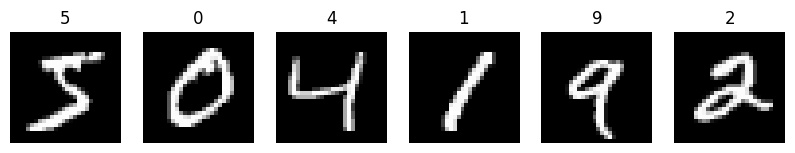

In [ ]:
# Visual quick look (first 6)
plt.figure(figsize=(10,2))
for i in range(6):
    plt.subplot(1,6,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')
plt.show()

### 2) Preprocess

In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32')  / 255.0

In [ ]:
# CNNs expect 4D input:
# It just expand the dimensions of the current array
# after expanding we will have (batchsize, height, width, channels)
x_train = np.expand_dims(x_train, -1)  # shape (N,28,28,1) 1 because MNIST images are grayscale
x_test  = np.expand_dims(x_test, -1)

In [ ]:
# pad 2 pixels each side -> (32,32,1)
# We’re literally increasing the image size by padding zeros (black pixels).
x_train = np.pad(x_train, ((0,0),(2,2),(2,2),(0,0)), mode='constant') # 0 means no padding
x_test  = np.pad(x_test,  ((0,0),(2,2),(2,2),(0,0)), mode='constant')

In [ ]:
print("Preprocessed shapes:", x_train.shape, x_test.shape)

Preprocessed shapes: (60000, 32, 32, 1) (10000, 32, 32, 1)


### 3) Build LeNet-style model

In [ ]:
def build_lenet(input_shape=(32,32,1), num_classes=10):
    model = Sequential([
        layers.Conv2D(6, kernel_size=(5,5), activation='tanh', input_shape=input_shape),  # classic uses tanh
        layers.AveragePooling2D(pool_size=(2,2)),
        layers.Conv2D(16, kernel_size=(5,5), activation='tanh'),
        layers.AveragePooling2D(pool_size=(2,2)),
        layers.Flatten(),
        layers.Dense(120, activation='tanh'),
        layers.Dense(84, activation='tanh'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

In [ ]:
model = build_lenet()
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

### 4) Compile

In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

### 5) Train (with a small validation split)

In [ ]:
history = model.fit(
    x_train, y_train,
    validation_split=0.1,
    epochs=12,
    batch_size=128,
    verbose=2
)

Epoch 1/12
422/422 - 9s - 22ms/step - accuracy: 0.8964 - loss: 0.3624 - val_accuracy: 0.9617 - val_loss: 0.1406
Epoch 2/12
422/422 - 1s - 3ms/step - accuracy: 0.9579 - loss: 0.1392 - val_accuracy: 0.9738 - val_loss: 0.0938
Epoch 3/12
422/422 - 2s - 4ms/step - accuracy: 0.9728 - loss: 0.0910 - val_accuracy: 0.9792 - val_loss: 0.0732
Epoch 4/12
422/422 - 2s - 5ms/step - accuracy: 0.9796 - loss: 0.0678 - val_accuracy: 0.9803 - val_loss: 0.0608
Epoch 5/12
422/422 - 1s - 3ms/step - accuracy: 0.9839 - loss: 0.0531 - val_accuracy: 0.9835 - val_loss: 0.0567
Epoch 6/12
422/422 - 1s - 3ms/step - accuracy: 0.9861 - loss: 0.0426 - val_accuracy: 0.9847 - val_loss: 0.0518
Epoch 7/12
422/422 - 1s - 3ms/step - accuracy: 0.9894 - loss: 0.0340 - val_accuracy: 0.9850 - val_loss: 0.0530
Epoch 8/12
422/422 - 1s - 3ms/step - accuracy: 0.9915 - loss: 0.0288 - val_accuracy: 0.9883 - val_loss: 0.0461
Epoch 9/12
422/422 - 1s - 3ms/step - accuracy: 0.9930 - loss: 0.0235 - val_accuracy: 0.9832 - val_loss: 0.0614


### 6) Plot training curves

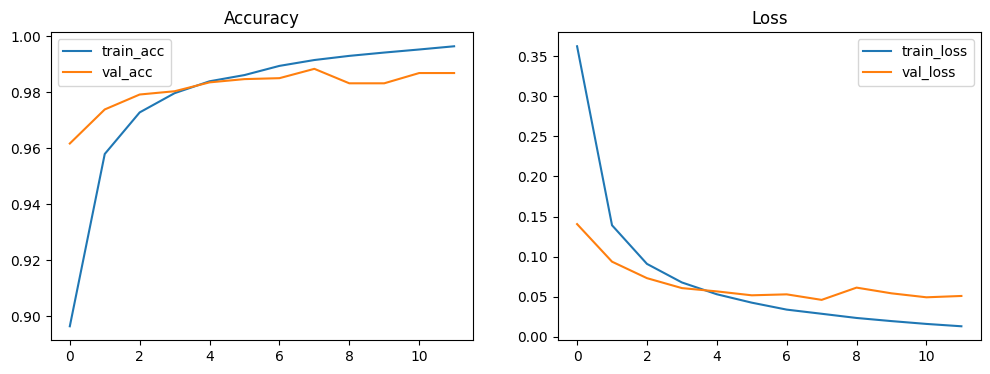

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend(); plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(); plt.title('Loss')
plt.show()

### 7) Evaluate on test set

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc*100:.2f}%  —  Test loss: {test_loss:.4f}")

Test accuracy: 98.53%  —  Test loss: 0.0465


## Saving model as h5 file format

In [ ]:
model.save('lenet_mnist.h5')

# Loaded again the the h5 LeNet model


In [19]:
# load model lenet mnist
import random, os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

loaded_model = keras.models.load_model('/content/lenet_mnist_trained_model.h5')

In [36]:
(_, _), (x_test, y_test) = keras.datasets.mnist.load_data()
print("x_test shapes only:",  x_test.shape, y_test.shape)

x_test shapes only: (10000, 28, 28) (10000,)


In [21]:
# normalize
x_test = x_test.astype("float32") / 255.0
# reshape
x_test = np.expand_dims(x_test, axis=-1)

print("x_test shape after preprocessing:", x_test.shape) # should be (10000, 28, 28, 1)

x_test shape after preprocessing: (10000, 28, 28, 1)


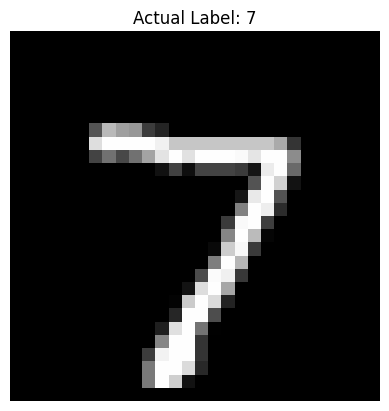

In [22]:
# Show one image to verify
plt.imshow(x_test[0].reshape(28,28), cmap='gray')
plt.title(f"Actual Label: {y_test[0]}")
plt.axis('off')
plt.show()

In [30]:
# Prepare the image for LeNet
# If your LeNet expects 32×32 input (like original LeNet), resize:
img = tf.image.resize(x_test[0:1], [32, 32])     # :1 create a batch dimension

print("Image shape for prediction:", img.shape)  # should be (1,32,32,1)

Image shape for prediction: (1, 32, 32, 1)


In [31]:
# 6. Predict using the loaded model
pred = loaded_model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


In [32]:
print("Predicted Label:", np.argmax(pred))
print("Actual Label:", y_test[0])

Predicted Label: 7
Actual Label: 7


In [35]:
print(img.shape)

(1, 32, 32, 1)
